In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
spy_1min = pd.read_csv('SPY_1hour_sample.txt', header=None, parse_dates=True)


spy_1min.columns = ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume']
spy_1min

,DateTime,Open,High,Low,Close,Volume
0,2023-05-01 04:00:00,416.15,416.150,415.58,415.70,223482
1,2023-05-01 05:00:00,415.81,416.140,415.79,416.00,75273
2,2023-05-01 06:00:00,415.99,416.040,415.62,415.90,56750
3,2023-05-01 07:00:00,415.90,415.949,415.40,415.42,161099
4,2023-05-01 08:00:00,415.91,416.340,415.27,415.73,286420
...,...,...,...,...,...,...
171,2023-05-15 15:00:00,412.43,413.030,412.37,413.01,7877345
172,2023-05-15 16:00:00,413.01,413.020,412.67,412.73,2053050
173,2023-05-15 17:00:00,412.65,413.010,412.65,412.75,57973
174,2023-05-15 18:00:00,412.74,412.900,412.60,412.70,48101


start_data_time and start_price can get from line 0, need know the next is up(include no change)  or down (Next direction), how many step to the next top or down

In [35]:
plt.figure(figsize=(200,50))
plt.plot( spy_1min['Close'])


In [36]:
spy_close = spy_1min[['DateTime', 'Close', 'Volume']]

df_spy_wave_by_close = []

start_date_time = spy_close['DateTime'][0]
start_price = spy_close['Close'][0]
start_volume = spy_close['Volume'][0]

if spy_close['Close'][1] >= spy_close['Close'][0]: 
    next_direction = 'up' 
else:
    next_direction = 'down'

is_current_direction_up = (next_direction == 'up')
is_curreent_direction_down = (next_direction == 'down')
next_top_bottom = None
step2top_or_bottom = 0


for i in range(1, len(spy_close)):
    step2top_or_bottom += 1
    if spy_close['Close'][i] >= spy_close['Close'][i-1]:
        if is_curreent_direction_down:
            next_top_bottom = spy_close['Close'][i-1]
            is_current_direction_up = True
            is_curreent_direction_down = False

            df_spy_wave_by_close.append([start_date_time, start_price, start_volume, 'down', next_top_bottom, abs(next_top_bottom - start_price),abs(next_top_bottom - start_price)*100/start_price, step2top_or_bottom])
            start_date_time = spy_close['DateTime'][i-1]
            start_price = spy_close['Close'][i-1]
            start_volume = spy_close['Volume'][i-1]
            step2top_or_bottom = 1

    if spy_close['Close'][i] < spy_close['Close'][i-1]:
        if is_current_direction_up:
            next_top_bottom = spy_close['Close'][i-1]
            is_current_direction_up = False
            is_curreent_direction_down = True

            df_spy_wave_by_close.append([start_date_time, start_price, start_volume, 'up', next_top_bottom, abs(next_top_bottom - start_price),abs(next_top_bottom - start_price)*100/start_price, step2top_or_bottom])

            start_date_time = spy_close['DateTime'][i-1]
            start_price = spy_close['Close'][i-1]
            start_volume = spy_close['Volume'][i-1]
            step2top_or_bottom = 1


df_spy_wave_by_close = pd.DataFrame(df_spy_wave_by_close)
df_spy_wave_by_close.columns = ['DateTime', 'ClosePrice', 'Volume', 'Direction', 'NextClosePrice', 'PriceChange', 'PriceChangePercentage', 'Step2TopOrBottom']

df_spy_wave_by_close




,DateTime,ClosePrice,Volume,Direction,NextClosePrice,PriceChange,PriceChangePercentage,Step2TopOrBottom
0,2023-05-01 04:00:00,415.7000,223482,up,416.0000,0.3000,0.072167,2
1,2023-05-01 05:00:00,416.0000,75273,down,415.4200,0.5800,0.139423,3
2,2023-05-01 07:00:00,415.4200,161099,up,416.9599,1.5399,0.370685,4
3,2023-05-01 10:00:00,416.9599,7369541,down,416.3499,0.6100,0.146297,2
4,2023-05-01 11:00:00,416.3499,6332308,up,417.1600,0.8101,0.194572,2
...,...,...,...,...,...,...,...,...
82,2023-05-15 09:00:00,410.8400,4930193,up,412.7600,1.9200,0.467335,4
83,2023-05-15 12:00:00,412.7600,4067748,down,412.3000,0.4600,0.111445,2
84,2023-05-15 13:00:00,412.3000,6357388,up,413.0100,0.7100,0.172205,3
85,2023-05-15 15:00:00,413.0100,7877345,down,412.7300,0.2800,0.067795,2


In [37]:
df_spy_wave_by_close.describe()

,ClosePrice,Volume,NextClosePrice,PriceChange,PriceChangePercentage,Step2TopOrBottom
count,87.000000,8.700000e+01,87.000000,87.000000,87.000000,87.000000
mean,411.783810,3.403176e+06,411.749902,1.104926,0.268525,2.988506
std,2.428729,4.040998e+06,2.393759,1.267208,0.307482,1.325021
min,404.360100,1.104000e+04,404.360100,0.010000,0.002424,2.000000
25%,410.929500,7.492050e+04,410.929500,0.175000,0.042390,2.000000
50%,412.100000,1.911399e+06,412.100000,0.710000,0.172205,3.000000
75%,412.775000,5.651946e+06,412.755000,1.557450,0.376634,4.000000
max,417.160000,1.988107e+07,417.160000,6.490000,1.563102,8.000000


<Axes: >

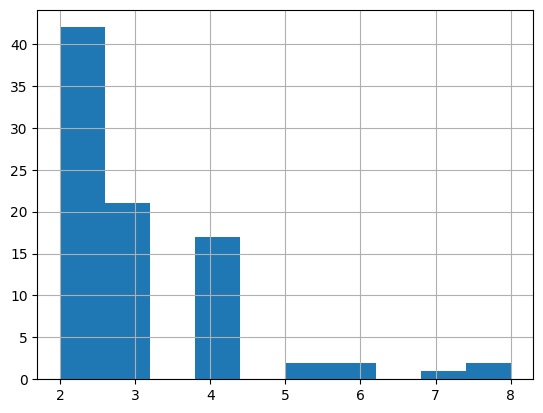

In [38]:
df_spy_wave_by_close['Step2TopOrBottom'].hist()